<a href="https://colab.research.google.com/github/dimdred/Jupyter/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     |████████████████████████████████| 20.6 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [10]:
print(f'Nan: {df_hh_income.isna().values.any()}   Duplicates: {df_hh_income.duplicated().values.any()}')
print(f'Nan: {df_pct_poverty.isna().values.any()}   Duplicates: {df_pct_poverty.duplicated().values.any()}')
print(f'Nan: {df_pct_completed_hs.isna().values.any()}   Duplicates: {df_pct_completed_hs.duplicated().values.any()}')
print(f'Nan: {df_share_race_city.isna().values.any()}   Duplicates: {df_share_race_city.duplicated().values.any()}')
print(f'Nan: {df_fatalities.isna().values.any()}   Duplicates: {df_fatalities.duplicated().values.any()}')

Nan: True   Duplicates: False
Nan: False   Duplicates: False
Nan: False   Duplicates: False
Nan: False   Duplicates: False
Nan: True   Duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [31]:
# df_hh_income['Median Income'].fillna(0, inplace=True)
df_fatalities['race'].isna().values.any()

True

In [38]:
df_fatalities.dropna(inplace=True)
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [48]:
state_data = df_fatalities.groupby('state', as_index=False).agg({'id': pd.Series.count})
state_data.rename(columns={'id': 'total'}, inplace=True)
state_data.sort_values('total', ascending=False, inplace=True)
state_bar = px.bar(state_data, x='state', y='total', color=state_data.total, title='Poverty Rate in each US State')
state_bar.update_layout(xaxis_title='Number of Fatalities', yaxis_title='State', coloraxis_showscale=False)
state_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [68]:
df_pct_completed_hs.percent_completed_hs.replace('-', '0', inplace=True)

In [82]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
school_data = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})
school_data.rename(columns={'percent_completed_hs': 'avg_completed_hs'}, inplace=True)
school_data.sort_values('avg_completed_hs', ascending=True, inplace=True)
school_bar = px.bar(school_data, x='Geographic Area', y='avg_completed_hs', color='avg_completed_hs', title='High School Graduation Rate by US State')
school_bar.update_layout(xaxis_title='Avg percent of completed hours', yaxis_title='State')
school_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

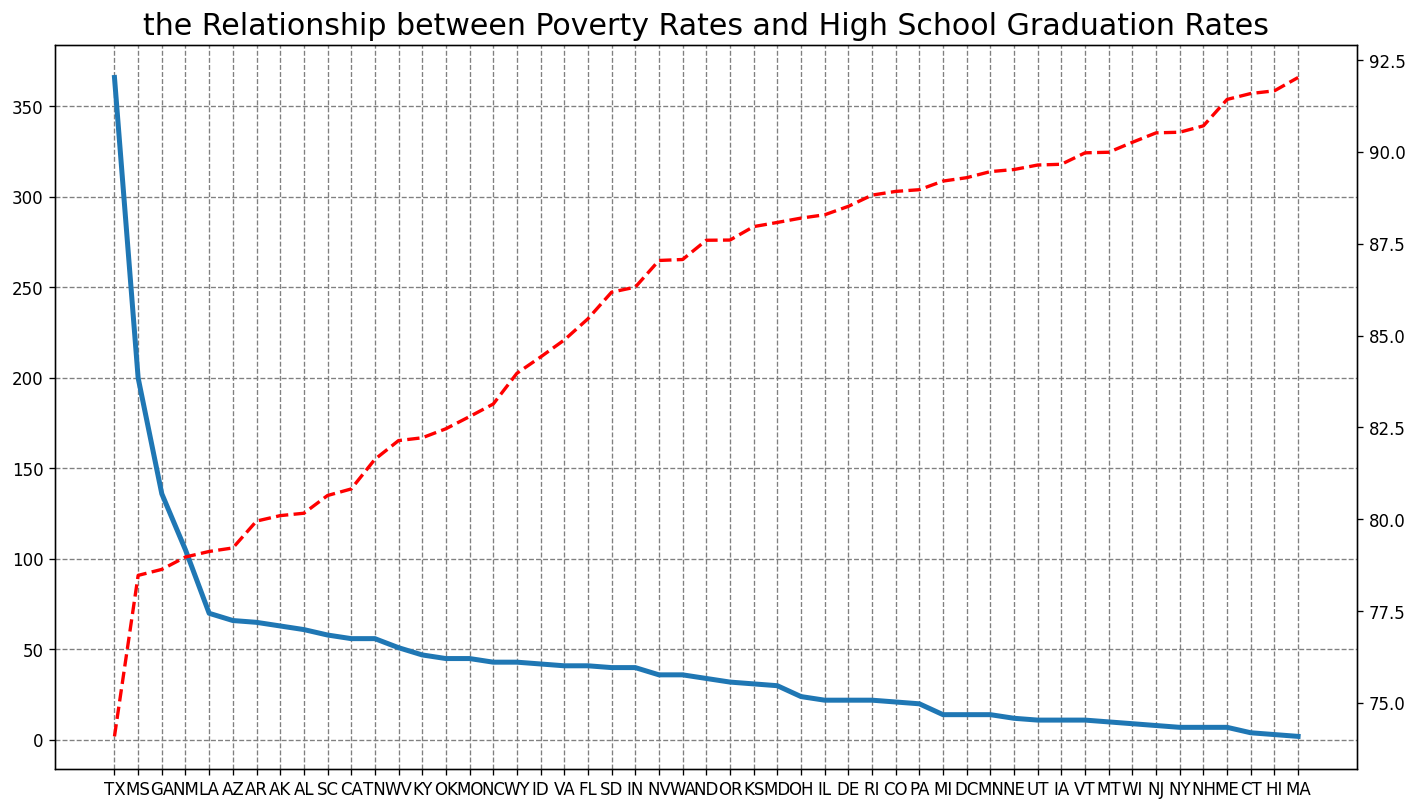

In [83]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('the Relationship between Poverty Rates and High School Graduation Rates', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.plot(state_data.state, state_data.total, linewidth=3)
ax2.plot(school_data['Geographic Area'], school_data['avg_completed_hs'], linewidth=2, color='red', linestyle='--')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [86]:
school_data.rename(columns={'Geographic Area':'state'}, inplace=True)
combined_data = school_data.merge(state_data, on='state')
combined_data

,state,avg_completed_hs,total
0,TX,74.09,200
1,MS,78.47,22
2,GA,78.63,61
3,NM,78.97,41
4,LA,79.12,47
5,AZ,79.22,105
6,AR,79.95,20
7,AK,80.10,14
8,AL,80.16,45
9,SC,80.65,41


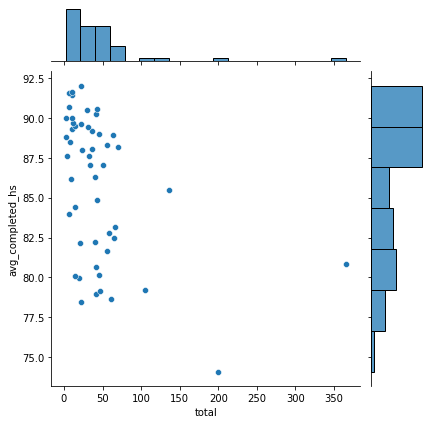

In [89]:
sns.jointplot(data=combined_data, x='total', y='avg_completed_hs')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

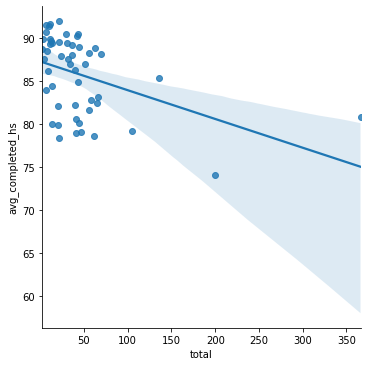

In [92]:
sns.lmplot(data=combined_data, x='total', y='avg_completed_hs')

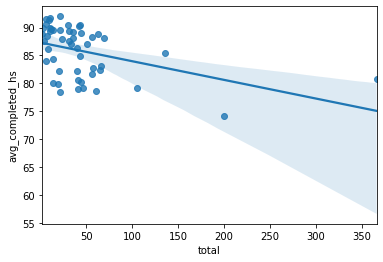

In [93]:
sns.regplot(data=combined_data, x='total', y='avg_completed_hs')

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [105]:
race_data = df_fatalities.groupby(['race','state'], as_index=False).agg({'id': pd.Series.count})
race_data.rename(columns={'id':'number'}, inplace=True)
race_bar = px.bar(race_data, x='state', y='number', color='race', title='Racial Makeup of Each US State')
race_bar.update_layout(xaxis_title='Race', yaxis_title='State')
race_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [112]:
race_df = race_data.groupby('race', as_index=False).agg({'number': pd.Series.sum})
fig = px.pie(race_df, values='number', names='race', title='People Killed by Race')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [117]:
gender_data = df_fatalities.groupby('gender', as_index=False).agg({'id': pd.Series.count})
gender_data.rename(columns={'id': 'number'}, inplace=True)
gender_data
fig = px.pie(gender_data, values='number', names='gender', title='Comparing the Total Number of Deaths of Men and Women', hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [121]:
manner_data = df_fatalities.groupby(['manner_of_death', 'gender'], as_index=False).agg({'id': pd.Series.count})
manner_data.rename(columns={'id': 'number'}, inplace=True)

In [124]:
fig = px.box(manner_data, x="gender", y="number")
fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [129]:
arm_data = df_fatalities.groupby('armed', as_index=False).agg({'id': pd.Series.count})
arm_data.rename(columns={'id': 'number'}, inplace=True)
arm_data.sort_values('number', inplace=True, ascending=False)
arm_bar = px.bar(arm_data, x='armed', y='number', color='number', title='Were People Armed?')
race_bar.update_layout(xaxis_title='Arm type', yaxis_title='Number')
arm_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [139]:
under_25 = df_fatalities[df_fatalities.age <= 25]
per_under25 = under_25.shape[0] / df_fatalities.shape[0] * 100
per_under25

22.937000887311445

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

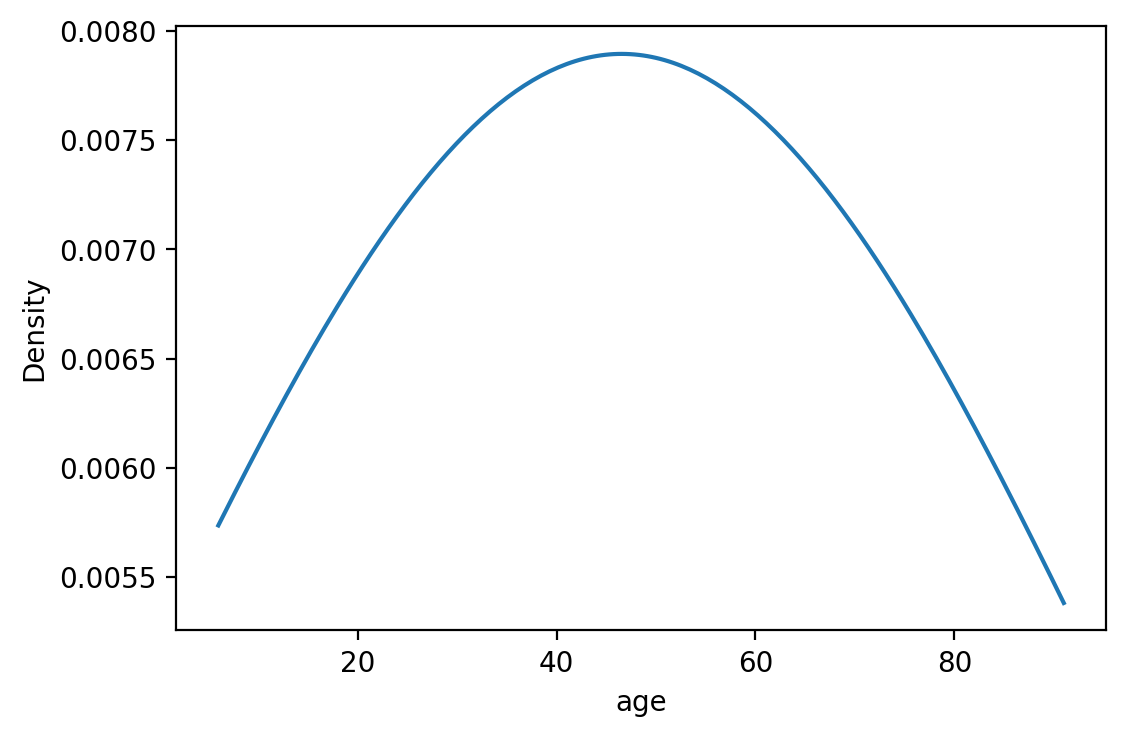

In [153]:
kde_ages = df_fatalities.groupby('age', as_index=False).agg({'id': pd.Series.count})
kde_ages.rename(columns={'id': 'number'}, inplace=True)

plt.figure(dpi=200)
sns.kdeplot(data=kde_ages, x='age', cut=0, bw_adjust=5)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

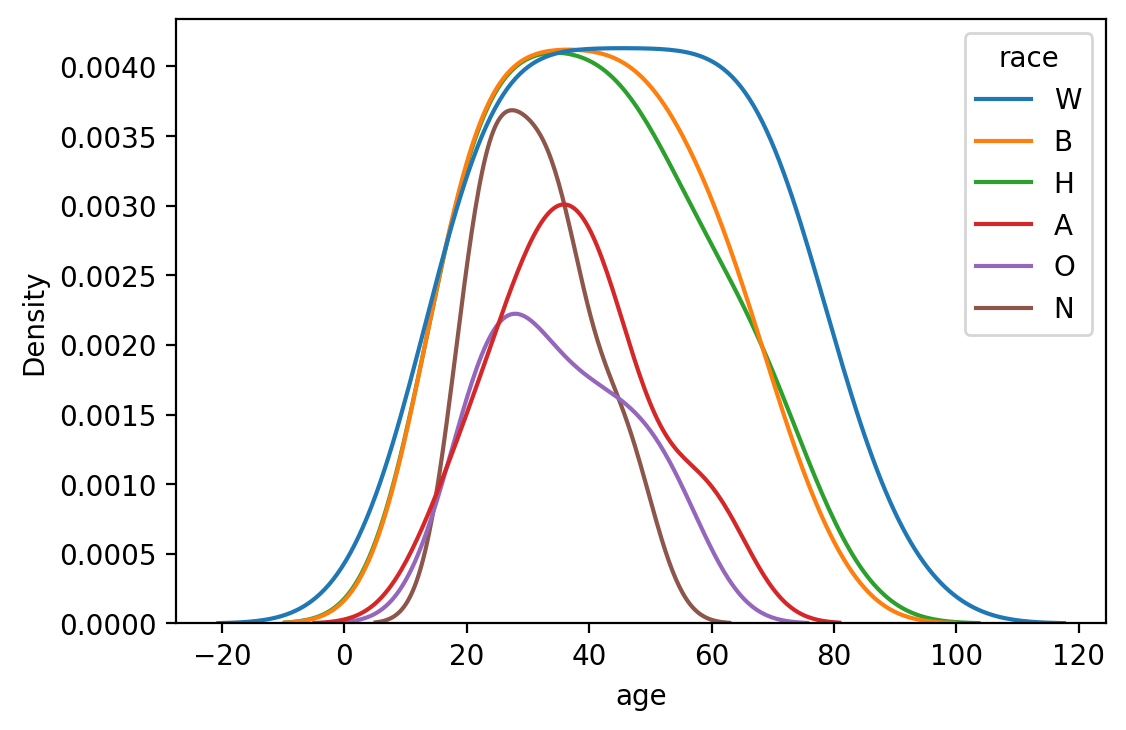

In [157]:
kde_races = df_fatalities.groupby(['age', 'race'], as_index=False).agg({'id': pd.Series.count})
kde_races.rename(columns={'id': 'number'}, inplace=True)

plt.figure(dpi=200)
sns.kdeplot(data=kde_races, x='age', hue='race')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [164]:
race_df.sort_values('number', inplace=True, ascending=False)
race_bar = px.bar(race_df, x='race', y='number', color='number', title='Race of People Killed')
race_bar.update_layout(xaxis_title='Race', yaxis_title='Number')
race_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [171]:
mental_data = df_fatalities.groupby('signs_of_mental_illness', as_index=False).agg({'id': pd.Series.count})
mental_data.rename(columns={'id': 'number'}, inplace=True)
fig = px.pie(mental_data, values='number', names='signs_of_mental_illness', title='Percentage of people killed  with a mental illness', hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [175]:
top_cities = df_fatalities.groupby('city', as_index=False).agg({'id': pd.Series.count})
top_cities.rename(columns={'id':'number'}, inplace=True)
top10_cities = top_cities.sort_values('number', ascending=False)[:10]
top10_cities

,city,number
658,Los Angeles,35
895,Phoenix,28
518,Houston,24
212,Chicago,22
57,Austin,18
619,Las Vegas,17
254,Columbus,16
1003,San Antonio,15
723,Miami,15
1095,St. Louis,14


In [177]:
city_bar = px.bar(top10_cities, x='city', y='number', color='number', title='Top Cities of People Killed')
city_bar.update_layout(xaxis_title='City', yaxis_title='Number')
city_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [184]:
top_race_cities = df_fatalities.groupby(['city','race'], as_index=False).agg({'id': pd.Series.count})
top_race_cities.rename(columns={'id':'number'}, inplace=True)

top_race_cities = top_race_cities.sort_values('number', ascending=False)
top10_race_cities = top10_race_cities.merge(top10_cities, on='city', how='inner')
top10_race_cities

,city,race,number_x,number_y
0,Chicago,B,19,22
1,Chicago,W,2,22
2,Chicago,H,1,22
3,Los Angeles,H,18,35
4,Los Angeles,B,10,35
5,Los Angeles,W,6,35
6,Los Angeles,A,1,35
7,Houston,B,14,24
8,Houston,H,5,24
9,Houston,W,3,24


In [186]:
cr_bar = px.bar(top10_race_cities, x='city', y='number_x', color='race', title='Top Cities of People Killed by Race')
cr_bar.update_layout(xaxis_title='City', yaxis_title='Number')
cr_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [219]:
map = px.choropleth(state_data, 
                    scope='usa',
                          locations='state',
                          color='total', 
                          hover_name='state', 
                          color_continuous_scale=px.colors.sequential.matter)
 
map.update_layout(coloraxis_showscale=True,)
map.show()

In [203]:
state_data

,state,total
4,CA,366
43,TX,200
9,FL,136
3,AZ,105
35,OH,70
27,NC,66
36,OK,65
5,CO,63
10,GA,61
24,MO,58


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [189]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

In [216]:
df_date = df_fatalities.groupby('date', as_index=False).agg({'id': pd.Series.count})
df_date

,date,id
0,2015-01-03,3
1,2015-01-04,2
2,2015-01-06,1
3,2015-01-07,2
4,2015-01-08,1
...,...,...
841,2017-12-02,2
842,2017-12-03,2
843,2017-12-04,1
844,2017-12-05,3


In [217]:
l_chart = px.line(df_date, x='date', y='id')
l_chart.update_layout(xaxis_title='Date',
                      yaxis_title='Number')
l_chart.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).